<a href="https://colab.research.google.com/github/SarunDz-12/229351-StatisticalLearning-or-Statistical-Learning-Labs./blob/main/Copy_of_229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [ ]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-05 15:57:19--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-05 15:57:19 (32.5 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [ ]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


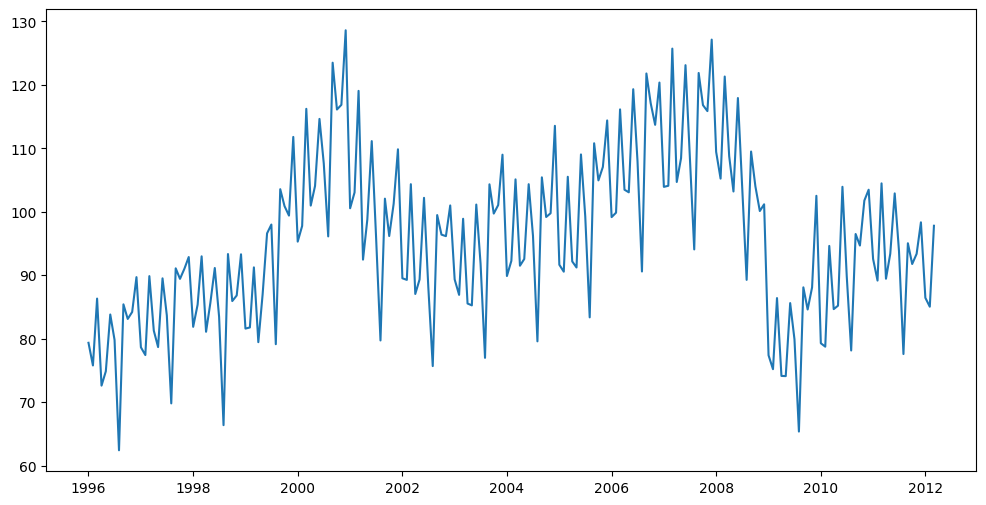

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [ ]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [ ]:
# Add or change values

data.loc['2012-03-02','value'] = 86

data

,Unnamed: 0,value
time,,
1996-01-01,1.0,79.35
1996-02-01,2.0,75.78
1996-03-01,3.0,86.32
1996-04-01,4.0,72.60
1996-05-01,5.0,74.86
...,...,...
2011-12-01,192.0,98.34
2012-01-01,193.0,86.44
2012-02-01,194.0,85.04


# Moving average

In [ ]:
data['MA'] = data['value'].rolling(window=5,center=True).mean()
#data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1.0,79.35,NaN
1996-02-01,2.0,75.78,NaN
1996-03-01,3.0,86.32,77.782
1996-04-01,4.0,72.60,78.674
1996-05-01,5.0,74.86,79.478
1996-06-01,6.0,83.81,74.696
1996-07-01,7.0,79.80,77.258
1996-08-01,8.0,62.41,78.908
1996-09-01,9.0,85.41,78.988


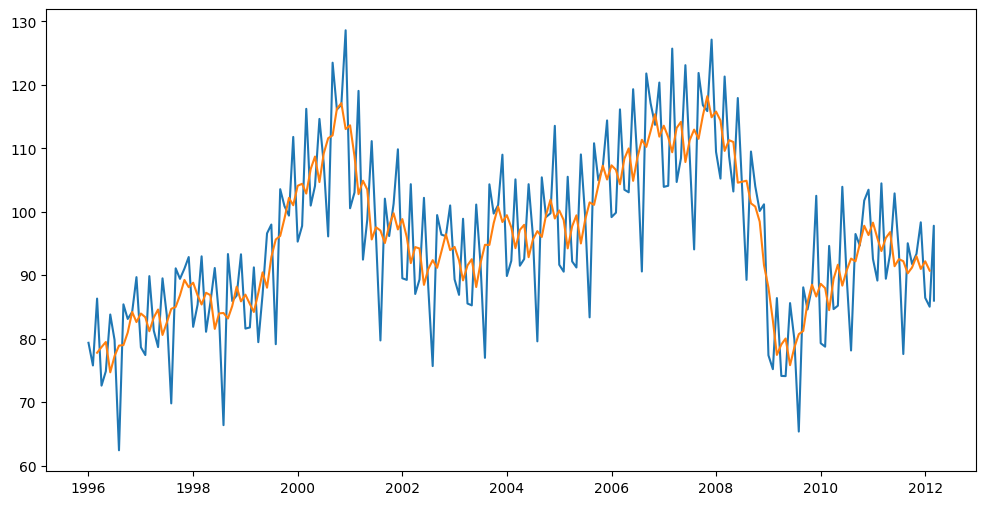

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

In [ ]:
import pandas as pd
from statsmodels.datasets import elec_equip

data = elec_equip.load_pandas().data
# ตั้งชื่อ column
data = data.rename(columns={0: "value"})
# ตั้ง datetime index (รายเดือน)
data.index = pd.date_range(start="1960-01-01", periods=len(data), freq="M")

print(data.head())

            STS.M.I7.W.TOVT.NS0016.4.000
1960-01-31                         66.19
1960-02-29                         65.15
1960-03-31                         74.48
1960-04-30                         71.26
1960-05-31                         67.63


/tmp/ipython-input-2280205831.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.index = pd.date_range(start="1960-01-01", periods=len(data), freq="M")


In [ ]:
print(data.columns)


Index(['STS.M.I7.W.TOVT.NS0016.4.000'], dtype='object')


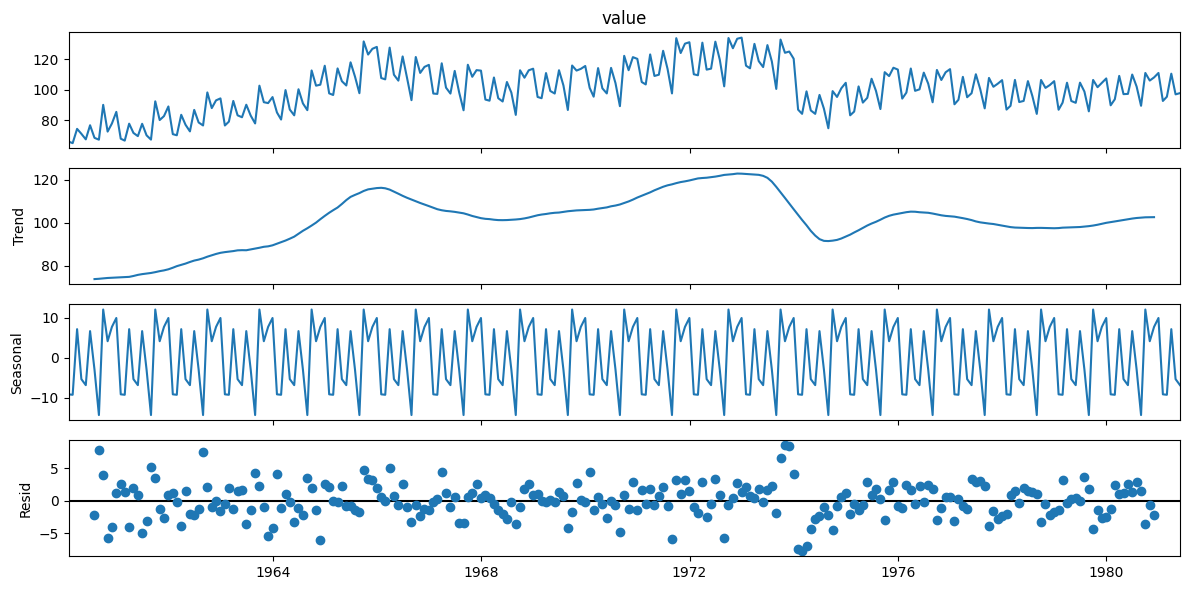

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

data = data.rename(columns={"STS.M.I7.W.TOVT.NS0016.4.000": "value"})
result_add = seasonal_decompose(data["value"], model="additive", period=12)


mpl.rc("figure", figsize=(12,6))
result_add.plot();

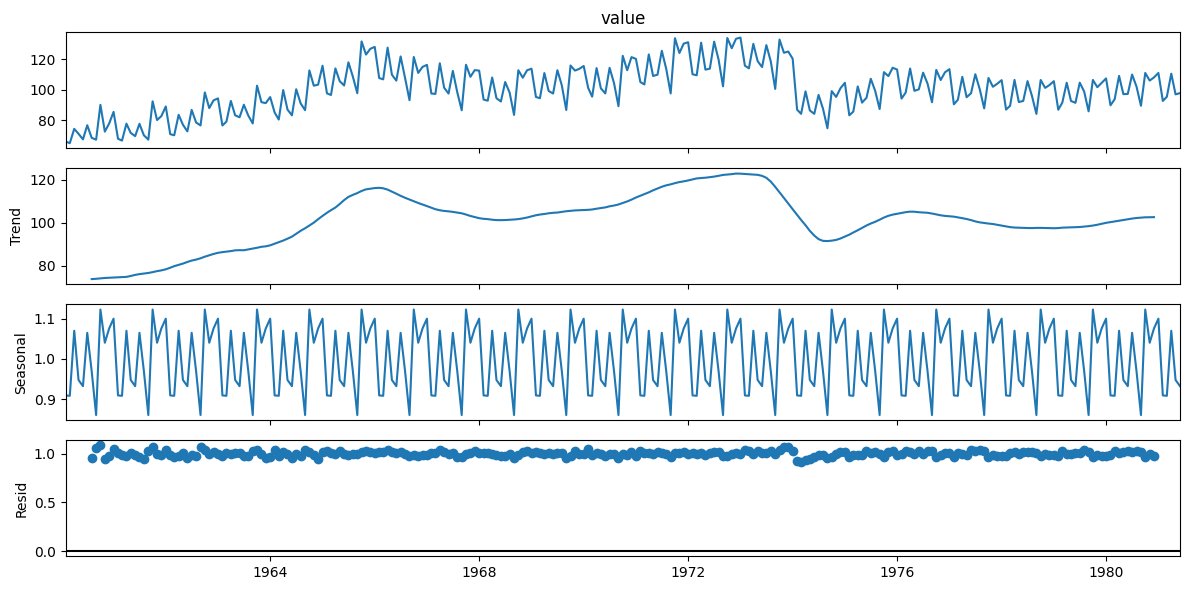

In [ ]:
data = data.rename(columns={"STS.M.I7.W.TOVT.NS0016.4.000": "value"})
result_mul = seasonal_decompose(data['value'], model='multiplicative')

result_mul.plot();

### เรียกดูแต่ละส่วน

In [ ]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

1960-01-31   NaN
1960-02-29   NaN
1960-03-31   NaN
1960-04-30   NaN
1960-05-31   NaN
              ..
1981-01-31   NaN
1981-02-28   NaN
1981-03-31   NaN
1981-04-30   NaN
1981-05-31   NaN
Freq: ME, Name: trend, Length: 257, dtype: float64
1960-01-31   -9.121999
1960-02-29   -9.234458
1960-03-31    7.163959
1960-04-30   -5.321479
1960-05-31   -6.827249
                ...   
1981-01-31   -9.121999
1981-02-28   -9.234458
1981-03-31    7.163959
1981-04-30   -5.321479
1981-05-31   -6.827249
Freq: ME, Name: seasonal, Length: 257, dtype: float64
1960-01-31   NaN
1960-02-29   NaN
1960-03-31   NaN
1960-04-30   NaN
1960-05-31   NaN
              ..
1981-01-31   NaN
1981-02-28   NaN
1981-03-31   NaN
1981-04-30   NaN
1981-05-31   NaN
Freq: ME, Name: resid, Length: 257, dtype: float64
1960-01-31     66.19
1960-02-29     65.15
1960-03-31     74.48
1960-04-30     71.26
1960-05-31     67.63
               ...  
1981-01-31     92.73
1981-02-28     95.49
1981-03-31    110.57
1981-04-30     97.05
1981-05

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

training set

In [ ]:
import pandas as pd
data = pd.read_csv('elecequip.csv', index_col='time', parse_dates=True)

train = data.loc['1996':'2009']
test = data.loc['2010':'2012-03']

print("Train", train.shape)
print("Test", test.shape)

Train (168, 2)
Test (27, 2)


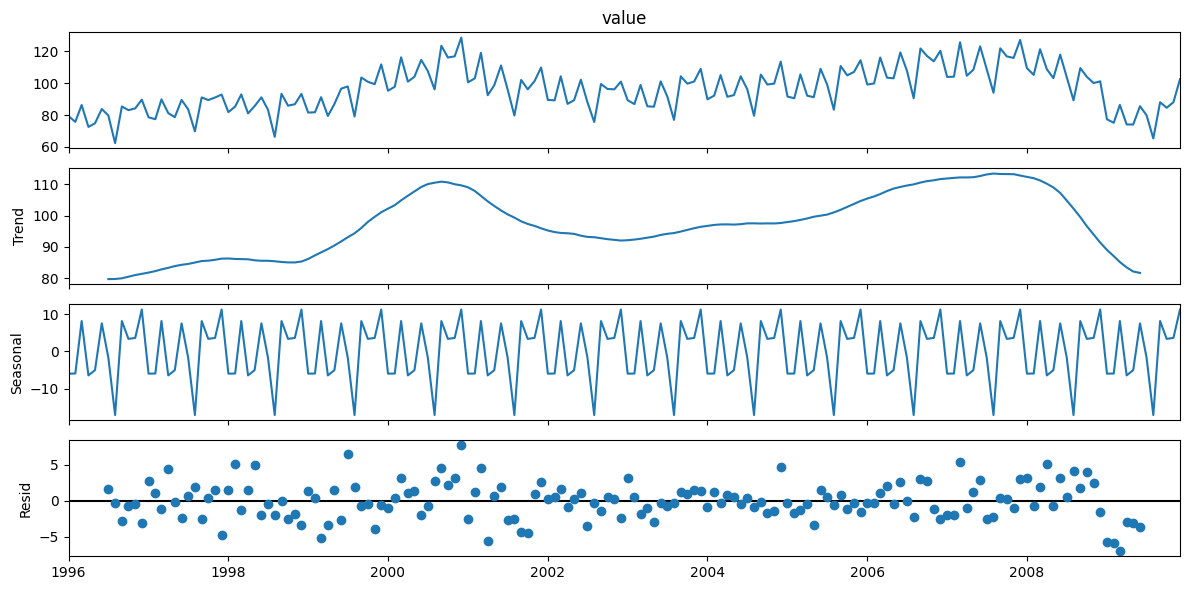

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train["value"], model="additive", period=12)

S_train = result.seasonal
T_train = result.trend
R_train = result.resid


result.plot();


In [ ]:
print(train.shape)
print(train.index.min(), train.index.max())


(168, 2)
1996-01-01 00:00:00 2009-12-01 00:00:00


In [ ]:
print(data.index.min(), data.index.max())


1996-01-01 00:00:00 2012-03-01 00:00:00


In [ ]:
import numpy as np
last_TR = (T_train + R_train).dropna().iloc[-1]
seasonal_pattern = S_train[-12:]

repeats = int(np.ceil(len(test) / 12))
S_test = np.tile(seasonal_pattern.values, repeats)[:len(test)]
S_test = pd.Series(S_test, index=test.index)


ts_forecast = S_test + last_TR

In [ ]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))
  import numpy as np
  rmse_value = rmse(test["value"], ts_forecast)
  print("RMSE =", rmse_value)

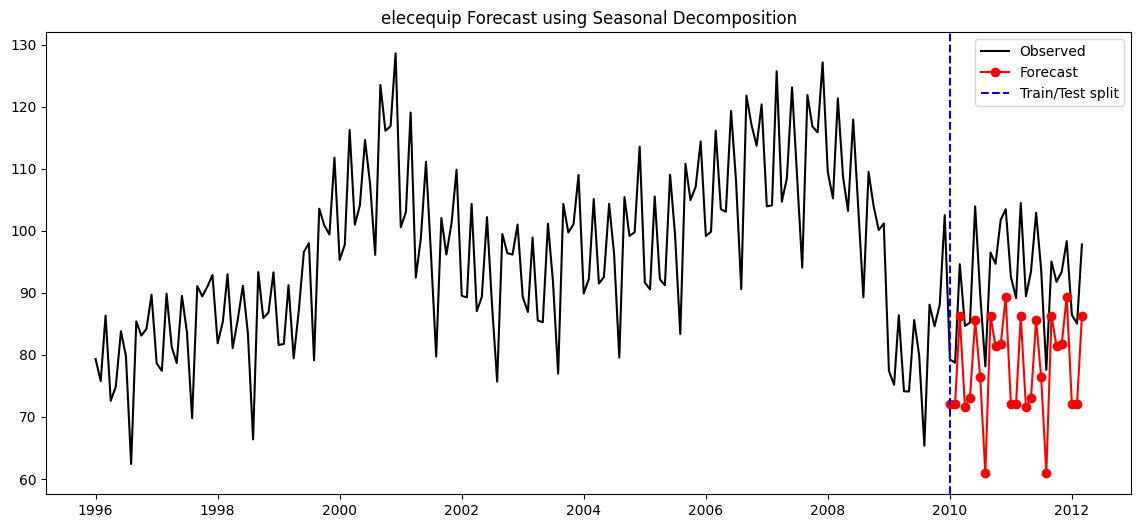

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(data.index, data["value"], label="Observed", color="black")
plt.plot(ts_forecast.index, ts_forecast, marker="o", color="red", label="Forecast")
plt.axvline(pd.to_datetime("2010-01-01"), color="blue", linestyle="--", label="Train/Test split")
plt.legend()
plt.title("elecequip Forecast using Seasonal Decomposition")
plt.show()


Text(0, 0.5, 'Value')

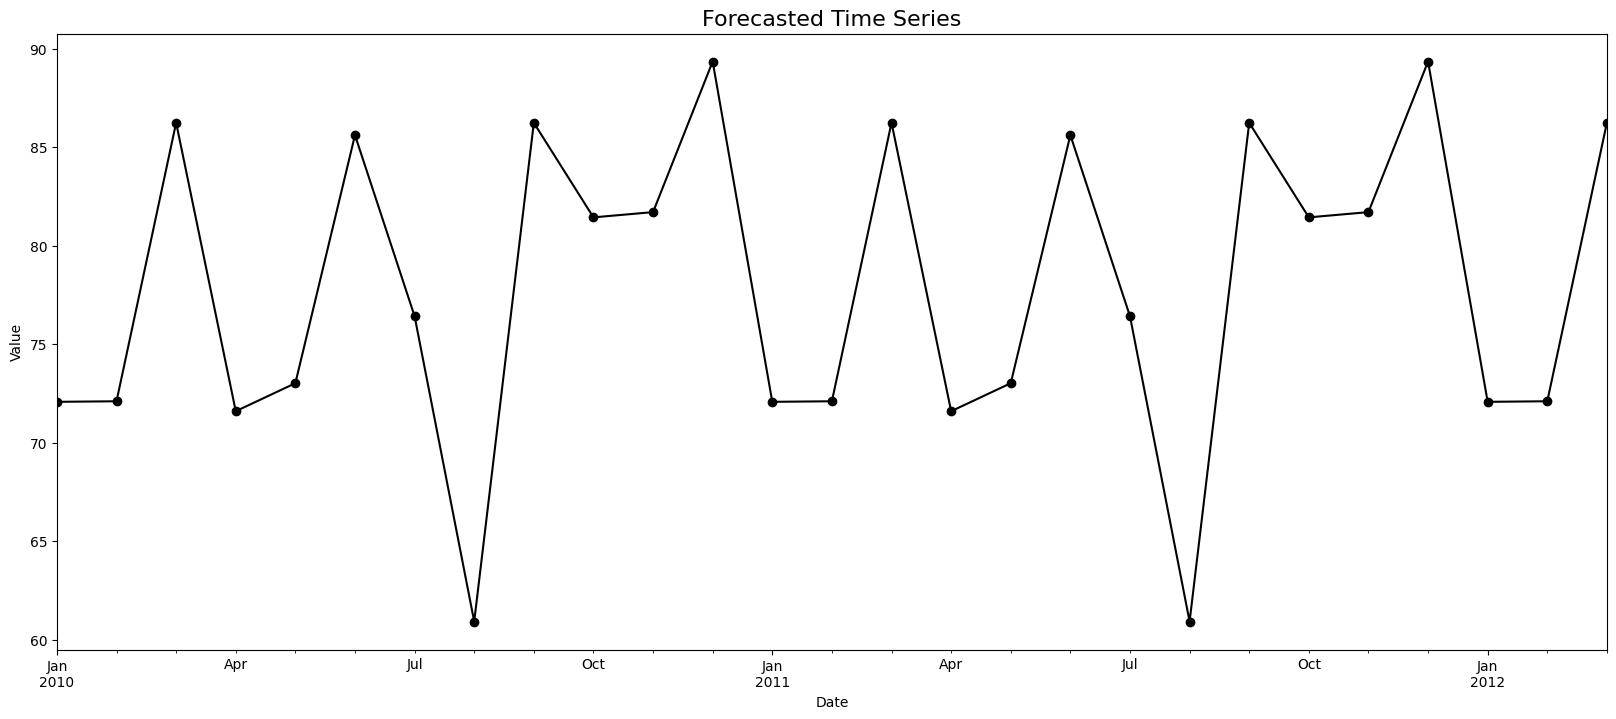

In [ ]:
ax = ts_forecast.plot(marker='o', color='black', figsize=(20,8))
ax.set_title("Forecasted Time Series", fontsize=16)
ax.set_xlabel("Date")
ax.set_ylabel("Value")